<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Area_of_research_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating a map of the research area**

In [2]:
pip install geopandas

     |████████████████████████████████| 994 kB 4.9 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.6 MB 29.4 MB/s 


In [40]:
pip install matplotlib_scalebar

In [3]:
pip install contextily

     |████████████████████████████████| 19.3 MB 40 kB/s 


In [4]:
pip install mapclassify

# *Importing modules*

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [6]:
import contextily as ctx

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

In [8]:
import mapclassify

In [9]:
from shapely.geometry import Point

# *Work with geoDataFrame*
Документация по [geopandas](https://geopandas.org/docs.html)

In [10]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Gomel_distr/Gomel_districts.shp' 
gomel = gpd.read_file(path)
crs={'init':'epsg:3857'}
#gomel = gomel.to_crs(epsg=3857)
gomel

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,Rad,geometry
0,22,BLR,Belarus,2,Homyel',17,Aktsyabar,Raion,District,None,Oktyabrski,10,"POLYGON ((3167705.449 6899649.390, 3167705.449..."
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,None,1480,"POLYGON ((3403743.630 6747844.076, 3402871.823..."
2,22,BLR,Belarus,2,Homyel',19,Buda-Kashalyowa,Raion,District,None,Buda-Koshelevo,185,"POLYGON ((3369725.543 6904534.867, 3370288.204..."
3,22,BLR,Belarus,2,Homyel',20,Chachersk,Raion,District,None,Chechersk,555,"POLYGON ((3467256.218 7008020.133, 3468723.809..."
4,22,BLR,Belarus,2,Homyel',21,Dobrush,Raion,District,None,None,555,"POLYGON ((3514231.231 6915488.741, 3514573.924..."
5,22,BLR,Belarus,2,Homyel',22,Homyel',Raion,District,None,Homyel,37,"POLYGON ((3493105.098 6821950.158, 3493015.284..."
6,22,BLR,Belarus,2,Homyel',23,Kalinkavichy,Raion,District,None,Kalinkovichi,185,"POLYGON ((3325703.759 6873590.176, 3326679.393..."
7,22,BLR,Belarus,2,Homyel',24,Karma,Raion,District,None,Korma,555,"POLYGON ((3417648.587 7029741.223, 3417648.587..."
8,22,BLR,Belarus,2,Homyel',25,Khoyniki,Raion,District,None,Khoiniki,1480,"POLYGON ((3358858.745 6714645.411, 3358727.528..."
9,22,BLR,Belarus,2,Homyel',26,Loyew,Raion,District,None,Loev,185,"POLYGON ((3444535.524 6813344.887, 3444759.102..."


In [11]:
gomel1 = gomel.drop('NL_NAME_2', axis = 1)
gomel1.cx[:, :5] #indexer to select by intersection with bounding box

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,VARNAME_2,Rad,geometry
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,1480,"POLYGON ((3403743.630 6747844.076, 3402871.823..."


In [12]:
gomel1['Rad'] = gomel1.Rad.apply(lambda i : 2500 if i == 1480 else i)
#gomel1.loc[1,'Rad'] = 2500 - замена в одной отдельной ячейке
gomel1.loc[12,'Rad'] = 1480
gomel1.loc[18,'Rad'] = 555
gomel1.loc[20,'Rad'] = 185
gomel1.loc[11,'Rad'] = 37
gomel1.loc[16,'Rad'] = 37
gomel1.loc[15,'Rad'] = 185
gomel1.loc[5,'Rad'] = 185
gomel1.loc[17,'Rad'] = 1480
gomel1.loc[3,'Rad'] = 1480
gomel1.loc[2,'Rad'] = 555
gomel1

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,VARNAME_2,Rad,geometry
0,22,BLR,Belarus,2,Homyel',17,Aktsyabar,Raion,District,Oktyabrski,10,"POLYGON ((3167705.449 6899649.390, 3167705.449..."
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,2500,"POLYGON ((3403743.630 6747844.076, 3402871.823..."
2,22,BLR,Belarus,2,Homyel',19,Buda-Kashalyowa,Raion,District,Buda-Koshelevo,555,"POLYGON ((3369725.543 6904534.867, 3370288.204..."
3,22,BLR,Belarus,2,Homyel',20,Chachersk,Raion,District,Chechersk,1480,"POLYGON ((3467256.218 7008020.133, 3468723.809..."
4,22,BLR,Belarus,2,Homyel',21,Dobrush,Raion,District,None,555,"POLYGON ((3514231.231 6915488.741, 3514573.924..."
5,22,BLR,Belarus,2,Homyel',22,Homyel',Raion,District,Homyel,185,"POLYGON ((3493105.098 6821950.158, 3493015.284..."
6,22,BLR,Belarus,2,Homyel',23,Kalinkavichy,Raion,District,Kalinkovichi,185,"POLYGON ((3325703.759 6873590.176, 3326679.393..."
7,22,BLR,Belarus,2,Homyel',24,Karma,Raion,District,Korma,555,"POLYGON ((3417648.587 7029741.223, 3417648.587..."
8,22,BLR,Belarus,2,Homyel',25,Khoyniki,Raion,District,Khoiniki,2500,"POLYGON ((3358858.745 6714645.411, 3358727.528..."
9,22,BLR,Belarus,2,Homyel',26,Loyew,Raion,District,Loev,185,"POLYGON ((3444535.524 6813344.887, 3444759.102..."


In [13]:
points = pd.DataFrame({'Name': ['Gomel', 'Mazyr'], 'Long': [30.996226529921525, 29.21851165502442], 'Lat': [52.444249994840895, 52.03615316685195]})
gdf= gpd.GeoDataFrame(points, geometry=gpd.points_from_xy(points.Long, points.Lat), crs=crs)
gdf.crs

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Gomel_distr/Gomel_districts_point.shp'
pnt = gpd.read_file(path1)
#pnt['coords'] = pnt['geometry'].apply(lambda x: x.representative_point().coords[:])
#pnt['coords'] = [coords[0] for coords in pnt['coords']]
pnt

,id,Name,geometry
0,1,Gomel,POINT (3449398.244 6877996.644)
1,2,Mazyr,POINT (3254309.752 6804603.225)


# *Work with map plots*
Usefull links:

http://www.geraintianpalmer.org.uk/2017/09/22/plotting-geopandas/
https://geopandas.org/gallery/plotting_basemap_background.html
https://ramiro.org/notebook/geopandas-choropleth/
https://gisgeography.com/choropleth-maps-data-classification/
https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data

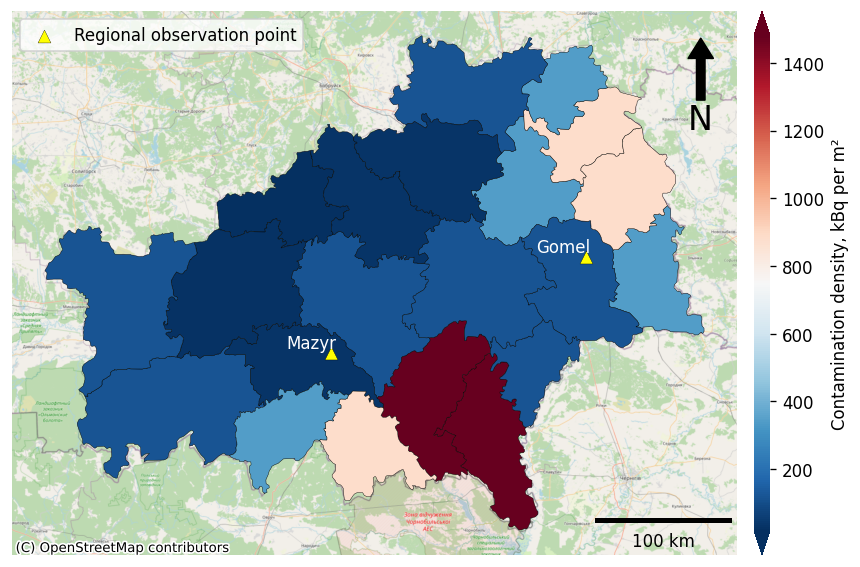

In [75]:
s = "%s²" % 'm'
cmap = 'RdBu_r'
norm = mpl.colors.Normalize(vmin=20, vmax=1480)
fig, ax = plt.subplots(1, figsize = (18, 6), dpi = 120)
gomel1.plot(column = 'Rad',
            edgecolor = 'black',
            linewidth=0.25,
            #legend=True,
            #legend_kwds={
            #    "label":'Contamination density, kBq per ' + s,          
            #    },           
            #alpha = 0.75,
            cmap=cmap,
            ax = ax)
pnt.plot(ax=ax, marker = '^',
         markersize = 60,
         color = 'yellow',
         label = 'Regional observation point',
         edgecolor = 'black',
         linewidth=0.2)
#add north arrow
x, y, arrow_length = 0.95, 0.95, 0.15
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
#add scale-bar
scalebar = ScaleBar(0.95, location='lower right',
                    box_color = 'None',
                    length_fraction=0.2) # 1 pixel = 0.9 km
plt.gca().add_artist(scalebar)
#add labels
for x, y, label in zip(pnt.geometry.x, pnt.geometry.y, pnt.Name): #подписи работают только через цикл
    ax.annotate(label, xy=(x, y),
                xytext=(3, 3),
                textcoords="offset points",
                horizontalalignment='right',
                color='white')
plt.legend(prop={'size':10}, loc = 2)
#add colorbar
#vmin = gomel1['Rad'].min()
#vmax = gomel1['Rad'].max()
sm = plt.cm.ScalarMappable(cmap = cmap,
                           norm = norm)
cb = fig.colorbar(sm, pad = 0.01, aspect = 30, extend = 'both') # aspect - делает colorbar тоньше
cb.set_label('Contamination density, kBq per ' + s)
cb.outline.set_visible(False)
ax.axis('off')  
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik) 
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig4.png' ,dpi=600)

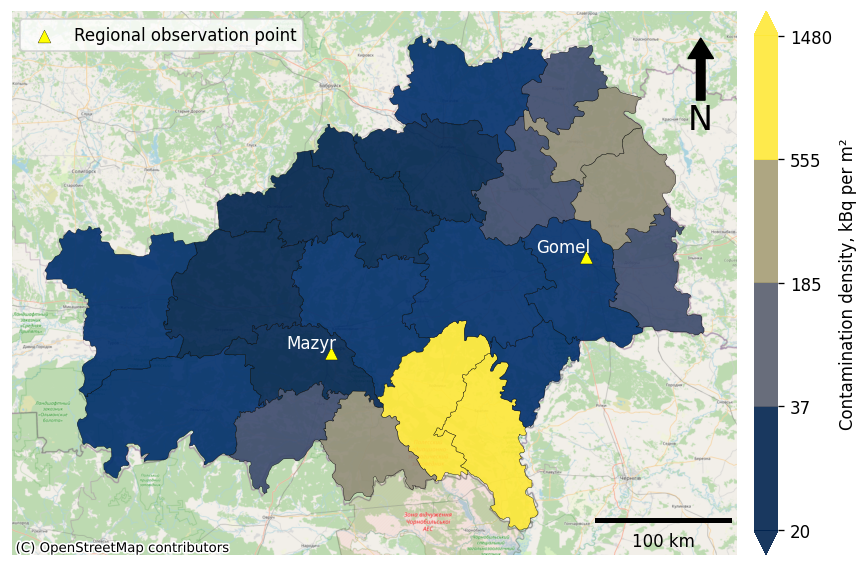

In [81]:
s = "%s²" % 'm'
cmap = mpl.cm.cividis
bounds = [20, 37, 185, 555, 1480]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(1, figsize = (18, 6), dpi = 120)
gomel1.plot(column = 'Rad',
            edgecolor = 'black',
            linewidth=0.25,          
            cmap=cmap, alpha = 0.9,
            ax = ax)
pnt.plot(ax=ax, marker = '^',
         markersize = 60,
         color = 'yellow',
         label = 'Regional observation point',
         edgecolor = 'black',
         linewidth=0.2)
#add north arrow
x, y, arrow_length = 0.95, 0.95, 0.15
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
#add scale-bar
scalebar = ScaleBar(0.95, location='lower right',
                    box_color = 'None',
                    length_fraction=0.2) # 1 pixel = 0.9 km
plt.gca().add_artist(scalebar)
#add labels
for x, y, label in zip(pnt.geometry.x, pnt.geometry.y, pnt.Name): #подписи работают только через цикл
    ax.annotate(label, xy=(x, y),
                xytext=(3, 3),
                textcoords="offset points",
                horizontalalignment='right',
                color='white')
plt.legend(prop={'size':10}, loc = 2)
#add colorbar
fig.colorbar(mpl.cm.ScalarMappable(cmap = cmap, norm=norm),              
             label = 'Contamination density, kBq per ' + s,
             pad = 0.01, extend = 'both',alpha = 0.9).outline.set_visible(False)
ax.axis('off')  
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik) 
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig5.png' ,dpi=600)

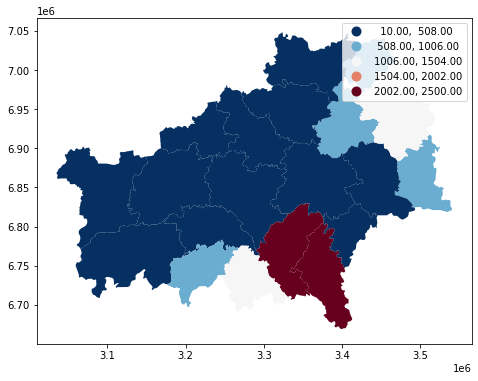

In [ ]:
s = "%s²" % 'm'
cmap = 'RdBu_r'
classes = 5

figsize = (18, 6)
ax = gomel1.plot(column = 'Rad',
                 cmap=cmap,
                 figsize = figsize,
                 scheme='equal_interval',
                 k=classes,
                 legend=True)